# Домашнее задание: линейная классификация

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Сперва загрузим датасет в Python

In [68]:
data = pd.read_csv('Social_Network_Ads.csv')
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
98,15575694,Male,35,73000,0
367,15671249,Male,46,88000,1
50,15694395,Female,24,32000,0
120,15811613,Female,36,75000,0
334,15814553,Male,57,60000,1


Данный набор данных, содержит информацию о том, покупает ли продукт человек определенного возраста, пола и с определенным доходом или нет.
Нам нужно предсказать, купит ли продукт целевая аудитория или нет.

## Предварительный анализ данных

Очевиндо, что столбец, который соответствует ID пользователя не несет для нас никакой ценной информации. Следовательно, чтобы модель не путалась из-за этого столбца, его следует удалить

In [8]:
# YOUR CODE

Посмотрим, есть ли пропущенные значения в датасете

In [9]:
# YOUR CODE

> Какие выводы можно сделать о пропущенных значениях? Нужно ли заполнять пропущенные значения? Если нужно, то как? 

Рассмотрим таблицу описательных статистик для датасета

In [10]:
# YOUR CODE

> Какие средние значения для каждого признака? Какие среднеквадратичные отклонения? Какие максимальные и минимальные значения?

Исследуем набор данных на выбросы с помощью графика
> Какой график отображает медиану, квартили и выбросы? Приведите команду для построения этого графика

In [11]:
# YOUR CODE
# Hint: если проблемы с масштабом, то можете вывести по отдельности

> Какие выводы о наличии аномальных значений можно сделать? Будут ли они сильно влиять на прогнозы модели?

Рассмотрим гистограммы распределений данных

In [20]:
# YOUR CODE
# Hint: лучше выводить по отдельности

> Какие выводы можно сделать о распределении `Age`? Схоже ли оно с нормальным распределением?

> Какие выводы можно сделать о распределении `EsimatedSalary`? Схоже ли оно с нормальным распределением?

> Какие выводы можно сделать о распределении `Purchased`? Как называется распределение, которому подчиняется эта случайная величина?

Сделаем еще некоторые предварительные выводы о взаимосвязи целевой переменной `Purchased` с остальными. Например, рассмотрим взаимосвязь `Gender` и `Age` с `Purchased`

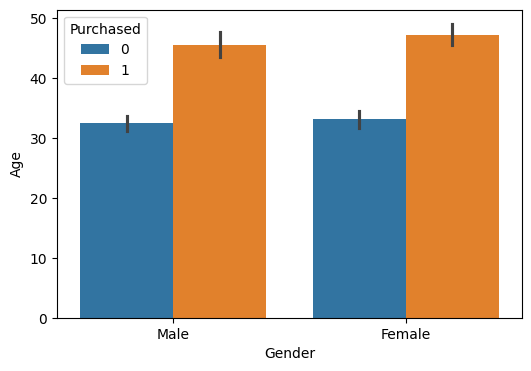

In [41]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Gender', y='Age', hue='Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между возрастом покупателя и совершением покупки?

> Есть ли статистическая разница между группами при совершении покупки?

Аналогично разделим на две группы по `Gender` и рассмотрим связь между `EstimatedSalary` и `Purchased`

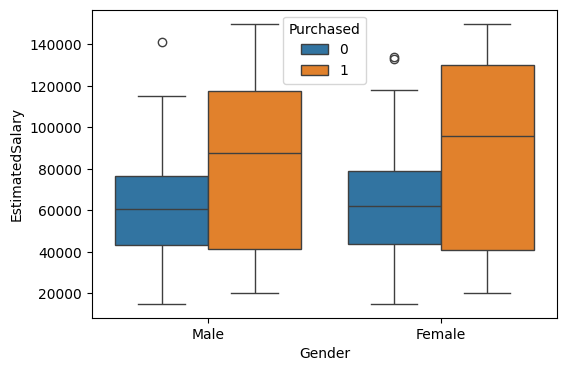

In [43]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Gender', y='EstimatedSalary', hue='Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между запрлатой покупателя и совершением покупки?

> Есть ли статистическая разница между группами при совершении покупки?

> Подумайте является ли `Gender` значимым фактором или мы можем удалить его?

Из графиков заметно, что ответ на последний вопрос <<не является>>. Следовательно, этот признак можно исключить из модели

In [44]:
# YOUR CODE

В итоге для моделирования у нас остались два значимых признака: `Age` и `EstimatedSalary`. Обозначим признаки за $X$, а целевую переменную за $y$

In [74]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Приняв каждый из признаков за координаты точек в признаковом пространстве, построим график рассеяния с метками классов

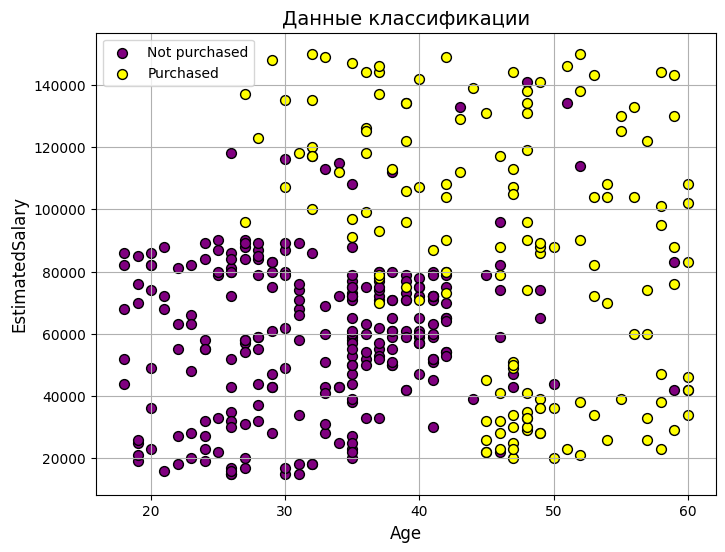

In [75]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y ==0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased', 
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',    
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Как видно, некоторая четко разделимая взаимосвязь есть.

> Попробуйте объяснить с физической точки зрения, какая взаимосвязь. Как возраст и зарплата в совокупности влияют на совершение покупки

В качестве последнего этапа стандартизируем нашу выборку, чтобы модели лучше отрабатывали

In [ ]:
scaler = StandardScaler()

X = # YOUR CODE

> Нужно ли стандартизировать $y$?

Снова построим диаграмму рассеяния, чтобы посмотреть, как изменился результат

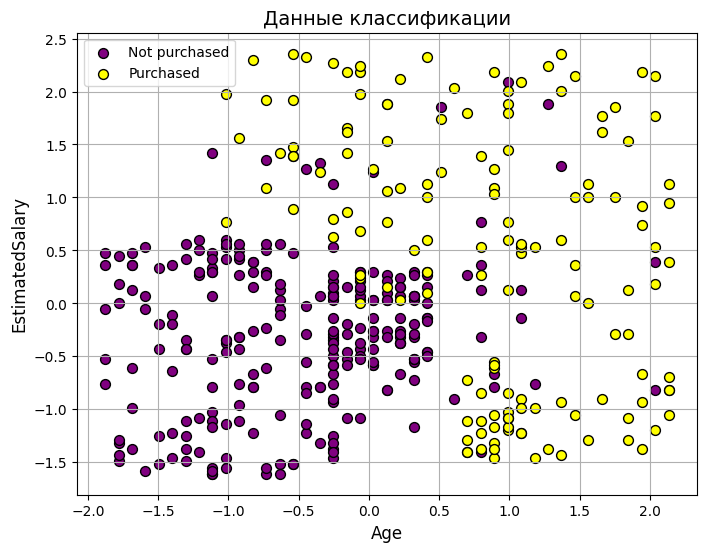

In [77]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y ==0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased', 
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',    
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

> Что изменилось по сравнению с предыдущим случаем?

## Построение классификационных моделей

### Логистическая регрессия

Разделим всю выборку на train и test наборы

In [95]:
X_train, X_test, y_train, y_test = # YOUR CODE

Теперь воспользуемся уже готовой реализацией модели линейной регрессии из библиотеки sklearn

In [79]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

Обучим модель на train выборке

In [98]:
# YOUR CODE

Определим функцию для визуализации разделяющей гиперплоскости

In [89]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Classification result")
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

Построим разделяющую гиперплоскость на всей выборке

In [ ]:
plot_decision_boundary(X, y, model1)

> Какие можно сделать выводы о качестве классификации из визуального представления?

Определим метрики классификации

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

И зададим функцию, которая сразу будет возвращать все метрики классификации

In [108]:
def show_metrics(target, predicts):
    confusion = confusion_matrix(target, predicts)
    accuracy = accuracy_score(target, predicts)
    precision = precision_score(target, predicts)
    recall = recall_score(target, predicts)

    print('=====================================')
    print(f'Confusion matrix : \n{confusion}')
    print('=====================================')
    print(f'Accuracy : {accuracy}')
    print('=====================================')
    print(f'Recall_Score : {recall}')
    print('=====================================')
    print(f'Precision Score : {precision}')

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [ ]:
y_hat = # YOUR CODE

show_metrics(y_train, y_hat)

In [ ]:
y_pred = # YOUR CODE

show_metrics(y_test, y_pred)

> Какие выводы можно сделать о результате классификации?

### Метод опорных векторов (линейный)

Проделяем все аналогичные действия для модели опорных векторов

In [111]:
from sklearn.svm import LinearSVC

model2 = LinearSVC()

Обучим модель на train выборке

In [98]:
# YOUR CODE

Построим разделяющую гиперплоскость на всей выборке

In [ ]:
plot_decision_boundary(X, y, model2)

> Какие можно сделать выводы о качестве классификации из визуального представления? Есть ли кардинальные отличия по сравнению с логистической моделью?

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [ ]:
y_hat = # YOUR CODE

show_metrics(y_train, y_hat)

In [ ]:
y_pred = # YOUR CODE

show_metrics(y_test, y_pred)

> Какие выводы можно сделать о результате классификации? Стали ли метрики лучше по сравнению с логистической моделью или наоборот ухудшились?

### Метод опорных векторов (с ядром)

Здесь мы воспользуемся уже [готовой реализацией из sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

In [141]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(
    clf, X, y, ax=None, support_vectors=True,
):

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of SVC")

    if ax is None:
        plt.show()

Далее обучим модель с линейным ядром (то же самое, что и в предыдущем случае)

In [ ]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Еще раз рассмотрим метрики на тестовом наборе, чтобы убедиться в том, что прошлый классификатор действительно имеет линейное ядро

In [ ]:
y_pred = # YOUR CODE

show_metrics(y_test, y_pred)

Теперь построим классификатор с полиномиальным ядром.

Из документации SVC:
- `degreeint, default=3`

Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

Под этим понимается, что по стандарту модель использует полиномиальное ядро третьей степени

In [ ]:
clf = svm.SVC(kernel='poly').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [ ]:
y_pred = # YOUR CODE

show_metrics(y_test, y_pred)

> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

Теперь построим модель с использованием гауссовского ядра

In [ ]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [ ]:
y_pred = # YOUR CODE

show_metrics(y_test, y_pred)

> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

> Проведите сравнительный анализ всех моделей между собой 

## Выводы

Таким образом, лучшей моделью (по вашему мнению) для решения задачи классификации покупательского спроса является модель -- ___________.

Она имеет следующие метрики:
- На Обучающем наборе
- - Accuracy : ___________
  - Precision : ___________
  - Recall : ____________
- На Тестовом наборе
- - Accuracy : ___________
  - Precision : ___________
  - Recall : ____________

Стоит понимать, что это не столько эталонный анализ, сколько базовый минимум. Вспомним, что в моделях также присутствуют гиперпараметры (например, регуляризация). По стандарту в моделях стоит значение $\lambda = 1$ для $L_2$ регуляризационного слагаемого. С помощью кросс-валидации по сетке можно было бы подобрать такой гиперпараметр, при котором результат классификации был бы лучше.

> По желанию можете попробовать реализовать кросс-валидацию по сетке значений гиперпараметра для логистической регрессии и линейной SVM. Попробуйте сравнить результаты